abalone 데이터를 사용하여 머신러닝 회귀 작업 수행

라이브러리 및 CSV 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
df = pd.read_csv('C:/dataset/abalone.csv', index_col = 0)

In [2]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

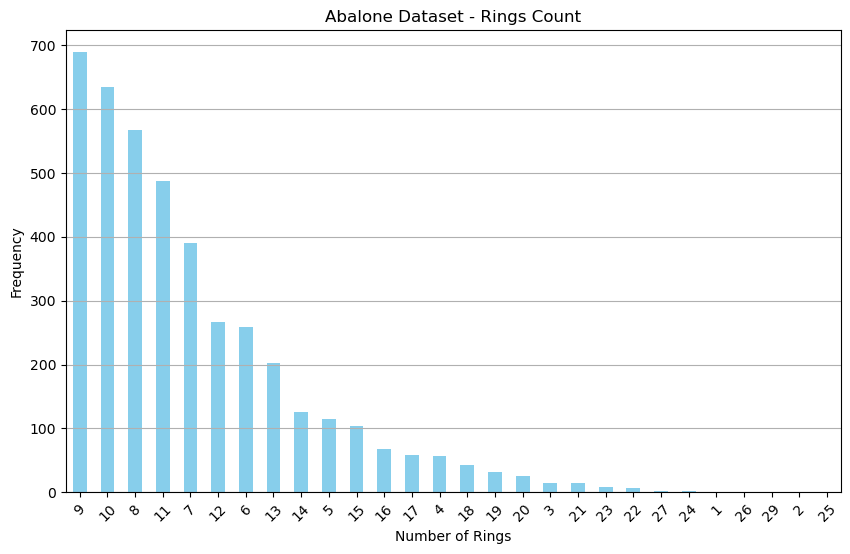

In [4]:
# 'Rings' 컬럼의 레이블 개수 확인
label_counts = df['Rings'].value_counts() 

# 그래프 생성
plt.figure(figsize=(10,6)) # 가로 10, 세로 6의 그림 생성 (없어도 무방)
label_counts.plot(kind='bar', color='skyblue') # label_counts의 막대 그래프 생성, 막대 색상은 하늘색

# 그래프 설정
plt.title('Abalone Dataset - Rings Count')
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.xticks(rotation=45) # x축의 눈금 설정 45도 돌려서 표시하겠다는 의미(없어도 무방)
plt.grid(axis='y') # y축을 따라 수평으로 격자선 그리기(없어도 무방)

# 그래프 보여주기
plt.show()

In [5]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [6]:
# 결측치 제거 및 다시 확인
df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [7]:
# Sex 컬럼 레이블 인코딩
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [8]:
# 특성과 타겟 분리
X = df.drop(['Rings'], axis=1)  # id 컬럼 제거
y = df['Rings']

In [9]:
# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# 스케일링
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)
ly_preds = model.predict(X_test_scaled)
# y_pred = model.predict(X_test_scaled)

# 데이터의 최대값과 최소값 확인
max_value = df['Rings'].max()  # 29
min_value = df['Rings'].min()  # 1
range_value = max_value - min_value  # 28

print('평균제곱근오차', mean_squared_error(ly_preds, y_test) / range_value)

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test) / range_value)

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test) / range_value)

평균제곱근오차 0.17215431812662343
평균제곱근오차 0.17215431812662343
평균제곱근오차 0.17215431812662343


In [14]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test_scaled)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test) / range_value)

평균제곱근오차 0.33335611756664385


In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test_scaled)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test) / range_value)

평균제곱근오차 0.17264667805878334


In [16]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train_scaled, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test_scaled)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test) / range_value)

평균제곱근오차 0.17676086805099486
